<a href="https://colab.research.google.com/github/Fahdlabba/FlowerClassifier/blob/main/FlowerClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [85]:
!cp kaggle.json ~/.kaggle/

In [86]:
!chmod 600 ~/.kaggle/kaggle.json

In [87]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

5-flower-types-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [88]:
from zipfile import ZipFile 
dataset='/content/5-flower-types-classification-dataset.zip'
with ZipFile(dataset,'r') as zip :
  zip.extractall()
  print("Dataset extracted ! ")

Dataset extracted ! 


In [89]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping 
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [90]:
lilly_flower=os.listdir("/content/flower_images/Lilly")
lotus_flower=os.listdir("/content/flower_images/Lotus")
orchid_flower=os.listdir("/content/flower_images/Orchid")
sunflower_flower=os.listdir("/content/flower_images/Sunflower")
tulip_flower=os.listdir("/content/flower_images/Tulip")


In [91]:
print(lilly_flower[:5] , len(lilly_flower))
print(lotus_flower[:5],len(lotus_flower))
print(orchid_flower[:5],len(orchid_flower))
print(sunflower_flower[:5],len(sunflower_flower))
print(tulip_flower[:5],len(tulip_flower))

['d8516f7e87.jpg', 'f9af90e875.jpg', 'ceef267e5a.jpg', 'f67e590919.jpg', '4bd5ee0dd7.jpg'] 1000
['29591eb02d.jpg', 'b9c65af4f9.jpg', 'e19b3cb38a.jpg', '15c93813c5.jpg', '7f528100a3.jpg'] 1000
['7db0c0f207.jpg', 'ba2fbc7272.jpg', '0c6199b87a.jpg', '9e29460447.jpg', '748abfdaf5.jpg'] 1000
['15ec939738.jpg', '44b7cfa23c.jpg', '7aba4f229a.jpg', '5a1f36ff31.jpg', '3d0de4db5c.jpg'] 1000
['e7a3fd9731.jpg', 'c9a5d9cd68.jpg', 'd864137f0c.jpg', 'b73b547962.jpg', '9c6b04612c.jpg'] 1000


Create Label foreach type of Image


**0->lilly**


**1->lotus**


**2->orchid**


**3->sunflower**


**4->tulip**

In [92]:
lilly_label=[0]*1000
lotus_label=[1]*1000
orchid_label=[2]*1000
sunflower_label=[3]*1000
tulip_label=[4]*1000

Display Some Images from diffirent type of flower


In [93]:
def display():
  images_path=["/content/flower_images/Lilly/00048a5c76.jpg",
               "/content/flower_images/Lotus/005fb079bf.jpg",
               "/content/flower_images/Orchid/002c100a56.jpg",
               "/content/flower_images/Sunflower/004e98f65a.jpg",
               "/content/flower_images/Tulip/009b4d16a9.jpg"
               ]
  for path in images_path : 
    image=mping.imread(path)
    imgplot=plt.imshow(image)
    plt.show()
        

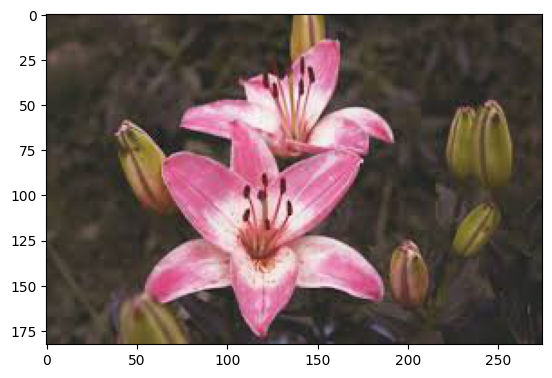

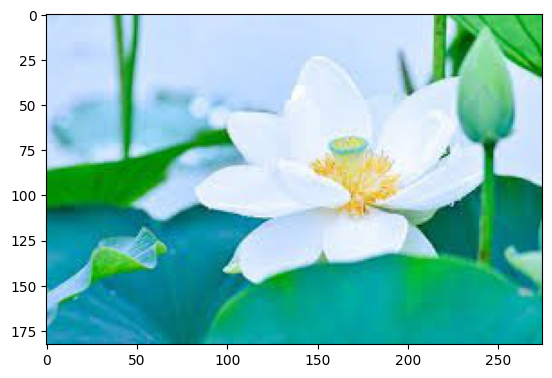

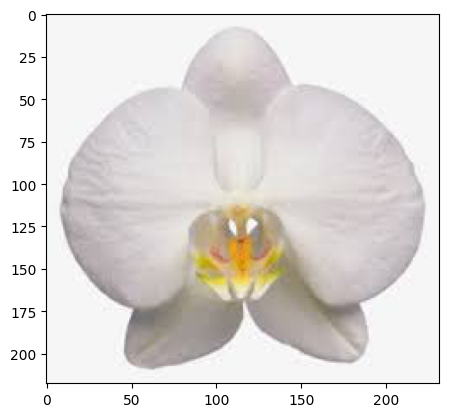

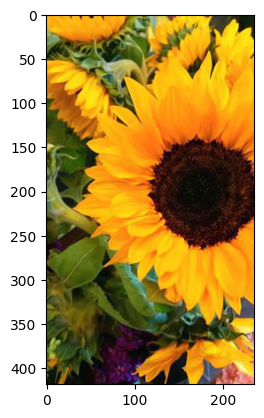

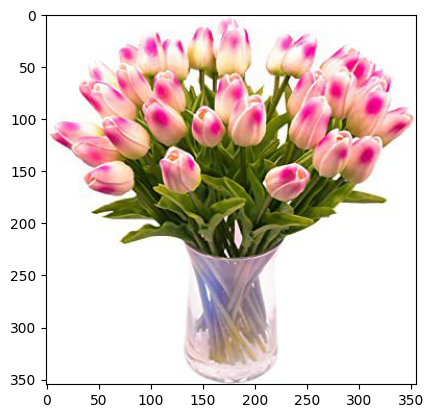

In [94]:
display()

Image Prerocessing

In [95]:
flower_path=["/content/flower_images/Lilly/",
             "/content/flower_images/Lotus/",
             "/content/flower_images/Orchid/",
             "/content/flower_images/Sunflower/",
             "/content/flower_images/Tulip/"
]
list_files=[lilly_flower,lotus_flower,orchid_flower,sunflower_flower,tulip_flower]
i=0;
data=[]
for path in flower_path :
  for img_file in list_files[i]:
    image=Image.open(path + img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
  i+=1


In [96]:
type(data)

list

In [97]:
len(data)

5000

In [98]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [99]:
data[0].shape

(128, 128, 3)

In [117]:
labels=lilly_label+ lotus_label+orchid_label+sunflower_label+tulip_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

5000
[0, 0, 0, 0, 0]
[4, 4, 4, 4, 4]


In [101]:
len(labels)

5000

In [102]:
X=np.array(data)
Y=np.array(labels)

In [103]:
print(X.shape)

(5000, 128, 128, 3)


In [104]:
print(Y.shape)

(5000,)


In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [106]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [107]:
import tensorflow as tf
from tensorflow import keras

In [134]:
model =keras.Sequential ( [
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation=tf.keras.activations.softmax)

] ) 

In [135]:
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

In [125]:
X_train_scaled.shape


(4000, 128, 128, 3)

In [136]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
113/113 [==============================] - 97s 853ms/step - loss: 1.4818 - acc: 0.3667 - val_loss: 1.1502 - val_acc: 0.5325
Epoch 2/5
113/113 [==============================] - 94s 834ms/step - loss: 1.2596 - acc: 0.4722 - val_loss: 1.0707 - val_acc: 0.5975
Epoch 3/5
113/113 [==============================] - 96s 849ms/step - loss: 1.1418 - acc: 0.5369 - val_loss: 0.9821 - val_acc: 0.6575
Epoch 4/5
113/113 [==============================] - 94s 832ms/step - loss: 1.0044 - acc: 0.6078 - val_loss: 0.9021 - val_acc: 0.6875
Epoch 5/5
113/113 [==============================] - 95s 845ms/step - loss: 0.8106 - acc: 0.6972 - val_loss: 0.7294 - val_acc: 0.7425


In [137]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

32/32 [==============================] - 8s 261ms/step - loss: 0.8256 - acc: 0.7010
Test Accuracy = 0.7009999752044678


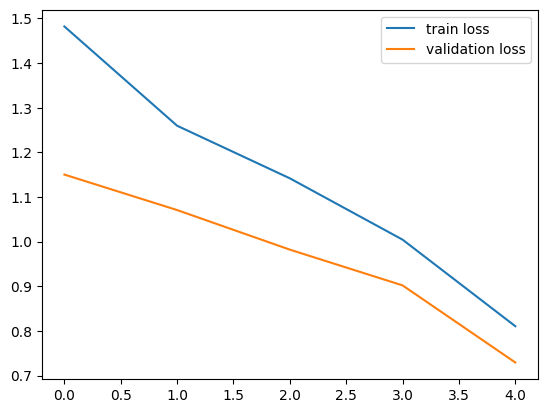

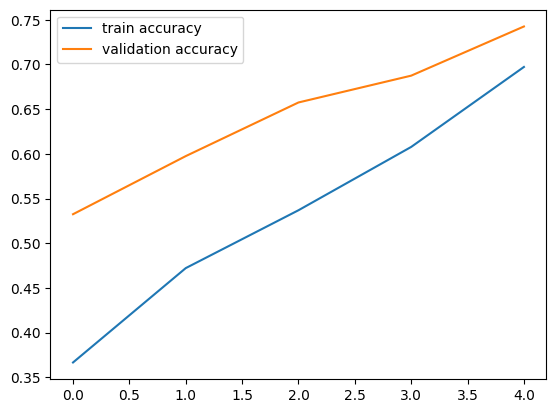

In [138]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()